<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/10%20Generative%20Adversarial%20Network/Context%20Encoders%20Feature%20Learning%20by%20Inpainting/context_encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context Encoders Feature Learning by Inpainting

In [1]:
from keras.datasets import cifar10
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Context%20Encoders%20Feature%20Learning%20by%20Inpainting/saved_model/generator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Context%20Encoders%20Feature%20Learning%20by%20Inpainting/saved_model/generator_weights.hdf5


--2019-09-07 23:24:01--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Context%20Encoders%20Feature%20Learning%20by%20Inpainting/saved_model/generator.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8639 (8.4K) [text/plain]
Saving to: ‘generator.json’

generator.json      100%[===================>]   8.44K  --.-KB/s    in 0s      

2019-09-07 23:24:01 (133 MB/s) - ‘generator.json’ saved [8639/8639]

--2019-09-07 23:24:02--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Context%20Encoders%20Feature%20Learning%20by%20Inpainting/saved_model/generator_weights.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.13

In [4]:
!ls

generator.json	generator_weights.hdf5	sample_data


In [5]:
def load_model(model_name):
    model_path = "%s.json" % model_name
    weights_path = "%s_weights.hdf5" % model_name
    
    
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_path)
    
    return loaded_model
  

generator = load_model("generator")








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
img_rows = 32
img_cols = 32
mask_height = 8
mask_width = 8
channels = 3
num_classes = 2
img_shape = (img_rows, img_cols, channels)
missing_shape = (mask_height, mask_width, channels)



def mask_randomly(imgs):
    y1 = np.random.randint(0, img_rows - mask_height, imgs.shape[0])
    y2 = y1 + mask_height
    x1 = np.random.randint(0, img_rows - mask_width, imgs.shape[0])
    x2 = x1 + mask_width

    masked_imgs = np.empty_like(imgs)
    missing_parts = np.empty((imgs.shape[0], mask_height, mask_width, channels))
    for i, img in enumerate(imgs):
        masked_img = img.copy()
        _y1, _y2, _x1, _x2 = y1[i], y2[i], x1[i], x2[i]
        missing_parts[i] = masked_img[_y1:_y2, _x1:_x2, :].copy()
        masked_img[_y1:_y2, _x1:_x2, :] = 0
        masked_imgs[i] = masked_img
    return masked_imgs, missing_parts, (y1, y2, x1, x2)


def sample_images(imgs):
    r, c = 3, 6

    masked_imgs, missing_parts, (y1, y2, x1, x2) = mask_randomly(imgs)
    gen_missing = generator.predict(masked_imgs)

    imgs = 0.5 * imgs + 0.5
    masked_imgs = 0.5 * masked_imgs + 0.5
    gen_missing = 0.5 * gen_missing + 0.5

    fig, axs = plt.subplots(r, c, figsize=(c*2,r*2))
    for i in range(c):
        axs[0,i].imshow(imgs[i, :,:])
        axs[0,i].axis('off')
        axs[1,i].imshow(masked_imgs[i, :,:])
        axs[1,i].axis('off')
        filled_in = imgs[i].copy()
        filled_in[y1[i]:y2[i], x1[i]:x2[i], :] = gen_missing[i]
        axs[2,i].imshow(filled_in)
        axs[2,i].axis('off')
    plt.show()
    
    
  

In [0]:
# Load the dataset
(X_train, y_train), (_, _) = cifar10.load_data()

# Extract dogs and cats
X_cats = X_train[(y_train == 3).flatten()]
X_dogs = X_train[(y_train == 5).flatten()]
X_train = np.vstack((X_cats, X_dogs))

# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
y_train = y_train.reshape(-1, 1)


idx = np.random.randint(0, X_train.shape[0], 6)
imgs = X_train[idx]  

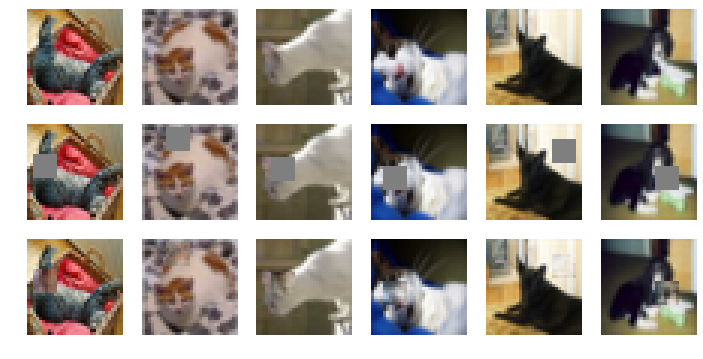

In [19]:
sample_images(imgs)